In [36]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import layers
from keras.callbacks import TensorBoard

In [37]:
# Code 3: Autoencoder, CNN, three layers (for encoder and for decoder)

In [38]:
input_img = Input(shape=(28, 28, 1)) 
encoding_dim = 32
#input_img = Input(shape=(784,))

encoded = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(4,4,8))
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation='relu')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

decoder = Model(encoded_input,decoded)

autoencoder = Model(input_img,decoder(encoder(input_img)))

In [39]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
model_21 (Model)             (None, 4, 4, 8)           1904      
_________________________________________________________________
model_22 (Model)             (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [41]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

In [45]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1751 - val_loss: 0.1691
Epoch 2/50
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1587 - val_loss: 0.1526
Epoch 3/50
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1492 - val_loss: 0.1452
Epoch 4/50
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1429 - val_loss: 0.1407
Epoch 5/50
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1377 - val_loss: 0.1419
Epoch 6/50
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1336 - val_loss: 0.1304
Epoch 7/50
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1303 - val_loss: 0.1315
Epoch 8/50
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1275 - val_loss: 0.1272
Epoch 9/50
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1251 - val_loss: 0.1

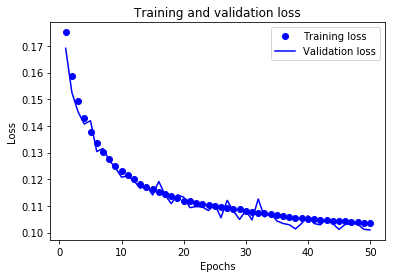

In [47]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 51)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

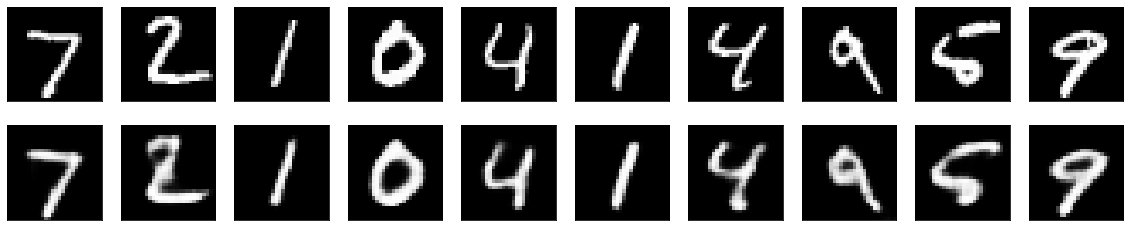

In [49]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()